# What makes Youtube videos trend?

Sharmeelee Bijlani

University of Washington

November 5, 2020


## Introduction
The purpose of this data analysis is to understand what makes Youtube videos trend. Is it the content, the uploader or is it a snowball effect of the popularity of the video itself? With online content gaining an increasing share of the human experience, I want to understand what makes content popular. Another rising career for people is being online influencers, many of whom are found on Youtube. What content empowers people to influence other people. Also I would like to understand if negative popularity is as good as positive popularity in the online content world where content is essentially free or paid for by human attention instead of money. 

## Data 

I plan to use the Youtube trend statistics dataset from Kaggle, a site that hosts various datasets and data science competitions for students and enthusiasts. The data I am using can be found at [this link](https://www.kaggle.com/datasnaek/youtube-new). This dataset includes many interesting features such as the number of views, number of likes, number of dislikes, and tags. I particularly liked this dataset since it not only provides the engagement metrics for top trending videos but also adds a geographic dimenstion of country for additional analysis. This dataset is CCO licensed for public domain. The data is hosted on Kaggle which is meant for people to use for educational as well has hobbyist purposes, and the uploader also shares reproducibilty information on how the data was scraped in his [public repository](https://github.com/mitchelljy/Trending-YouTube-Scraper). The data was scraped using the publicly avaiable Youtube API. Although videos posted on Youtube are public and not protected by privacy unless they voilate copyright issues, there is no informed consent for uploaders to have thier names used in data analysis projects. The passive vs. informed consent is an ethical issue in this analysis. 

## Background 
As a start to my research into this topic, I went to the Youtube support site to understand the purpose of the concept of trending videos from the perspective of Youtube. In thier own words, "Trending aims to surface videos that a wide range of viewers would find interesting" [[1]](https://support.google.com/youtube/answer/7239739?hl=en#:~:text=Trending%20aims%20to%20surface%20videos,surprising%2C%20like%20a%20viral%20video.&text=The%20list%20of%20trending%20videos%20is%20updated%20roughly%20every%2015%20minutes). Although Youtube does not define the term interesting, it does clarify that trending is based on view count. Due to the lack of elaboration on interesting, this leads me to ask the question of whether interesting translates into something that is popular in terms of views, likes, dislikes, or a combination of these. Youtube also claims that they make sure videos with mature or inappropriate content do not make it to the top trending list. I would like to explore whether this is really true by exploring the videos with many dislikes and what makes them trend. 

While there are two types of trending videos, those from popular channels and those which are viral, is one more likely to trend than the other? I came across an article on themanifest.com that shares tips and suggestions on how to make a Youtube video trend. It claims that the Youtube algorithm for trending vidoes takes into account: watch time, video length and channel consistency. For channel consistency, the hypothesis is that "YouTube wants to promote channels more than individual videos" [[2]](https://themanifest.com/digital-marketing/resources/tips-to-make-video-trending-youtube). Since my dataset has information about channel and uploader, I want to assess the validity of this hypothesis and explore whether popularity is associated with channels or specific videos. 


## Research questions 
1. Given the notion that any publicity is good publicity, are number of reactions correlated to number of views?
2. Building upon the same idea, do videos with high positive or negative polarization have higher number of views?
3. Can videos with negative or inappropriate content trend? What makes negative videos trend? 
4. What themes of videos have the most viewership?
5. Is popularity attributed to specific videos or channels/uploaders?

## Methodology
To assess the first three research questions, I plan to start with exploratory data analysis to understand the associations between video reactions and view count. This will be followed by statistical analysis of the hypothesis which aim to accept or reject the validity of the associations. For the third research question on negative content, I plan to do additional exploratory data analysis on videos with high number of dislikes. First I need to find the threshold of dislikes that makes a video negative vs. nuetral. Then, perform content analysis on the negative videos. To find additional insights and patterns in the textual content of trending videos, I will create visualizations of titles and descriptions to find common themes. For the last research question, I will assess the association of videos from popular channels with view count against individual videos with view count. 

## Part 1: Import the data

To start, I need to import the data along with required data analysis packages such as pandas. Download the US videos data at this [link](https://www.kaggle.com/datasnaek/youtube-new). Save the .csv file locally and import it as a pandas dataframe. Below you can see a snapshot of the dataset I am using. A sample of the data is saved in the Github repository with this notebook. 

In [1]:
# Create a dataframe from the US videos csv file
import pandas as pd

df = pd.read_csv("USvideos.csv")
df.head().to_csv("USvideos_sample.csv")
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


## Part 2: Analysis of Video Reactions
### Research Question 1: Are number of likes or disikes correlated to number of views?

This section analyzes the reactions such as likes, dislikes and views to assess popularity. The first research questions attempts to find correlation between likes and dislikes with the number of views a trending video recieves. The code below creates a scatter plot of the likes and dislikes against the number of views. 

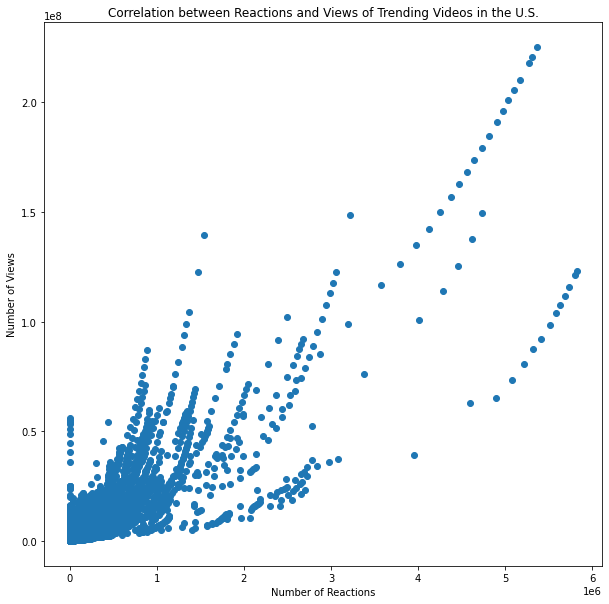

In [2]:
# plot scatter chart of reactions vs. views 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(df["likes"] + df["dislikes"], df["views"])
plt.title("Correlation between Reactions and Views of Trending Videos in the U.S.")
plt.xlabel("Number of Reactions")
plt.ylabel("Number of Views")
plt.savefig("Reactions_Views_Correlation.png")

For further interpretability of the results, I calculate the correlation coefficient and its p-value to assess statistical significance. Assuming a confidence interval of 90%, the results are significant and the hypothesis that increased reactions result in increased views is not rejected. 

In [3]:
# Calculate the correlation coefficient and p-value 
import numpy as np
import scipy.stats

x = np.array(df['likes'] + df['dislikes'])
y = np.array(df['views'])
scipy.stats.pearsonr(x, y)    # Pearson's r

(0.8553606170110806, 0.0)

To further break down the analysis of reacions into likes and dislikes and assess their correlation with views, I am calculating the correlation coefficient and p-value for each. As seen below, the number of likes are highly correlated with the number of views and the result is statistically significant. 

In [4]:
# Calculate the correlation coefficient of likes and views, and p-value 
import numpy as np
import scipy.stats

x = np.array(df['likes'])
y = np.array(df['views'])
scipy.stats.pearsonr(x, y)    # Pearson's r

(0.8491765212088973, 0.0)

Siimlarly, the number of likes are correlated (but not quite as much as the number of likes) with the number of views and the result is statistically significant. 

In [5]:
# Calculate the correlation coefficient of dislikes and views, and p-value 
x = np.array(df['dislikes'])
y = np.array(df['views'])
scipy.stats.pearsonr(x, y)    # Pearson's r

(0.47221324564593253, 0.0)

To visualize the results, I am again using a scatter plot, however, I have encoded likes and dislikes with color to higlight the differece in effect.

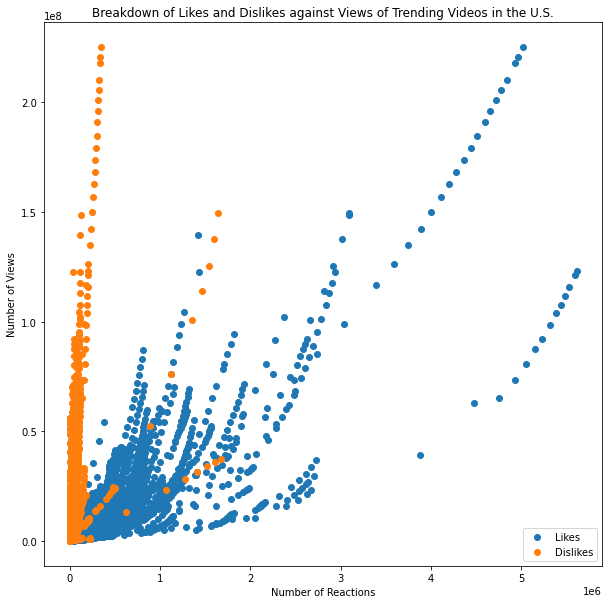

In [6]:
# plot scatter chart of likes/dislikes vs. views 
plt.figure(figsize=(10, 10))
plt.scatter(df["likes"], df["views"], label='Likes')
plt.scatter(df["dislikes"], df["views"], label='Dislikes')
plt.title("Breakdown of Likes and Dislikes against Views of Trending Videos in the U.S.")
plt.xlabel("Number of Reactions")
plt.ylabel("Number of Views")
plt.legend()
plt.savefig("Reactions_Breakdown_Views_Correlation.png")

### Research Question 2: Do videos with high positive or negative polarization have higher number of views?

This question attempts to dive deeper into understanding how likes and dislikes translate into a postiive or negative polarity for a trending video. To do that, I first calculate the polarity by taking the ratio of likes or dislikes over the total number of reactions. I have added two additional columns to the dataset to reflect these metrics. A snapshot of the data with the added columns is displayed below. 

In [7]:
# Add a column in the dataframe for positive and negative polarization ratio. ex: (likes / (likes + dislikes))
df['pos_polar'] = df['likes'] / (df['likes'] + df['dislikes'])
df['neg_polar'] = df['dislikes'] / (df['likes'] + df['dislikes'])
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,pos_polar,neg_polar
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0.950970,0.049030
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0.940521,0.059479
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.964729,0.035271
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0.938550,0.061450
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,0.985181,0.014819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,0.964977,0.035023
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,0.993674,0.006326
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,0.978982,0.021018
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,0.985465,0.014535


Now, I can plot the polarity ratio against the number of views to visualize the correlation. I start with plotting positive polarity against views. As seen in the chart below, the number of views increases as positive polarization increases. 

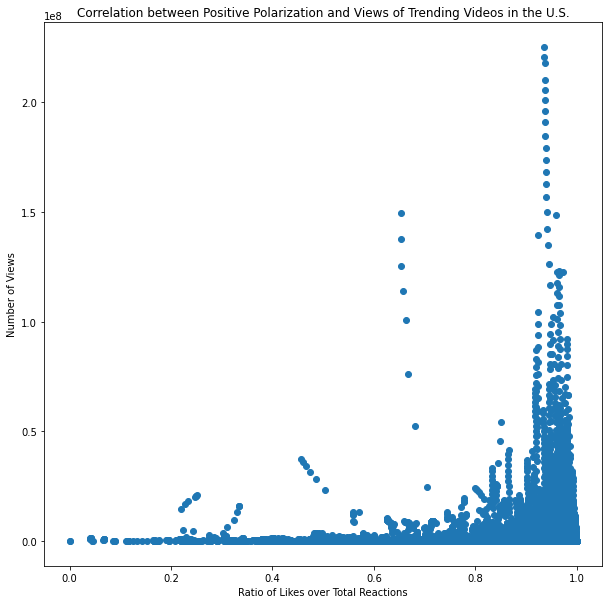

In [8]:
# Plot scatter plot of correlation between positive polarization against number of views
plt.figure(figsize=(10, 10))
plt.scatter(df["pos_polar"], df["views"])
plt.title("Correlation between Positive Polarization and Views of Trending Videos in the U.S.")
plt.xlabel("Ratio of Likes over Total Reactions")
plt.ylabel("Number of Views")
plt.savefig("PostivePolarization_Views_Correlation.png")

Repeat the same for plotting negative polarity against the number of views. Interestingly, the number of views decreases as negative polarization of a video increases. 

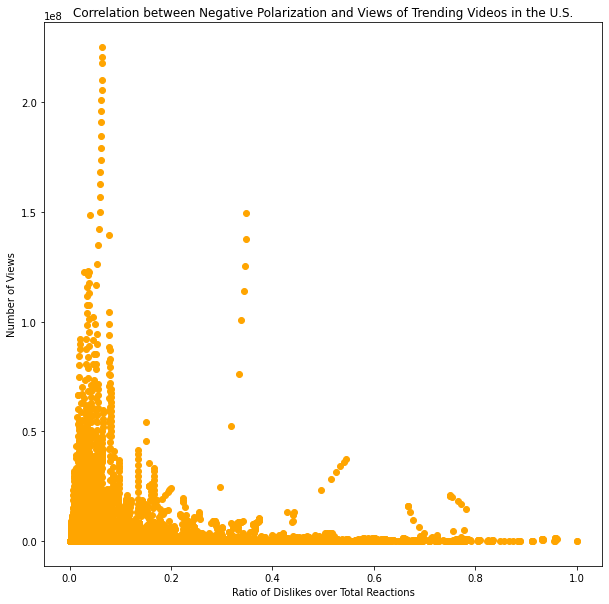

In [9]:
# Plot scatter plot of correlation between negative polarization against number of views
plt.figure(figsize=(10, 10))
plt.scatter(df["neg_polar"], df["views"], color='orange')
plt.title("Correlation between Negative Polarization and Views of Trending Videos in the U.S.")
plt.xlabel("Ratio of Dislikes over Total Reactions")
plt.ylabel("Number of Views")
plt.savefig("NegativePolarization_Views_Correlation.png")

## Part 3: Analysis of Video Text
### Research Question 3: Can videos with negative or inappropriate content trend? What makes negative videos trend? 

In this section, I take a deeper look at the text content of trending videos, such as titles and descriptions. For the third research question, I want to understand whether negative videos trend and based on that, why that happens. To answer the question, I set two thresholds of negative polarization (number of dislikes/total reactions) and found the number of videos in that dataset that exceed the thresholds. As seen below, only 0.01% of the videos exeed a 50% negativity threshold and 0.00056 percent of the videos exceed a 90% threshold. This shows that although negative videos can trend, very few make it to the top trending list.

In [10]:
# filter dataframe to keep only videos with 90% dislikes
neg_df = df[df["neg_polar"]>0.5]
print(str(len(neg_df)) + '/' + str(len(df)))
print(len(neg_df)/len(df))

neg_df = df[df["neg_polar"]>0.9]
print(str(len(neg_df)) + '/' + str(len(df)))
print(len(neg_df)/len(df))

576/40949
0.014066277564775697
23/40949
0.0005616742777601407


Next, I want what are the common topics among these negative videos that make it to the trending list. The code below removes stop words from the negative video titles to process the dataframe for meaningful text analysis. 

In [11]:
# remove stopwords from dataframe
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

stop = STOP_WORDS
neg_df['title'] = neg_df['title'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stop))
top_words = pd.Series(' '.join(neg_df.title).split()).value_counts()[:10]
top_words = top_words.to_frame()
top_words

<ipython-input-11-44fc69f5dc8c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_df['title'] = neg_df['title'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stop))


,0
Judge,8
Campaign,8
Moore,8
Roy,8
Statement,8
FCC,7
The,4
net,4
rules,4
words,4


Then, I create a bar chart with frequency count of the top 10 words. As seen in the chart below, a lot of proper nouns appear among the top 10 words and some themes like sports and policy appear. 

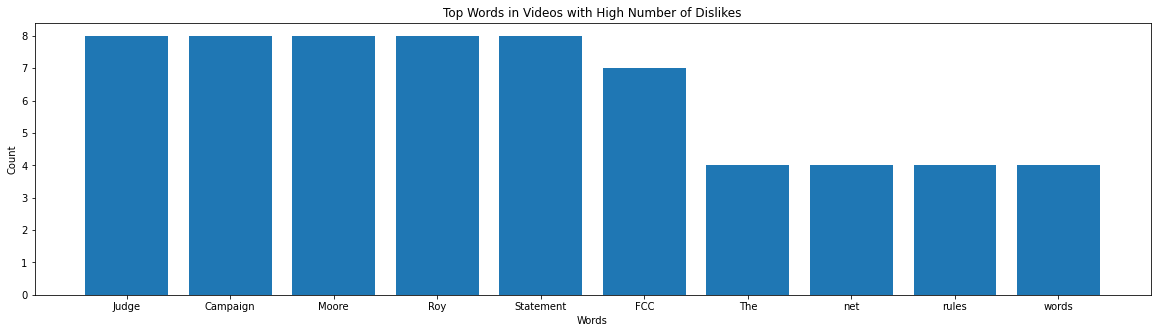

In [12]:
# plot bar chart of words in title vs. count 
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.bar(top_words.index, top_words[0])
plt.title("Top Words in Videos with High Number of Dislikes")
plt.xlabel("Words")
plt.ylabel("Count")
plt.savefig("TopWordsInNegVideos.png")

### Research Question 4: What themes of videos have the most viewership?

This question attempts to find more insights into text themes for the entire dataset, not just negative videos. As done earlier, the code below remove stopwords from the video titles to get meaningful insights upon further visualization in a wordcloud. 

In [13]:
# remove stopwords from the dataframe and create a wordcloud
from wordcloud import WordCloud, STOPWORDS 
    
title_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the words in title column
for val in df.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    title_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(title_words) 

The code below creates the wordcloud. As seen in the visual, many common themes appear such as official videos (music, trailers), entertainment, sports, and celebrities.

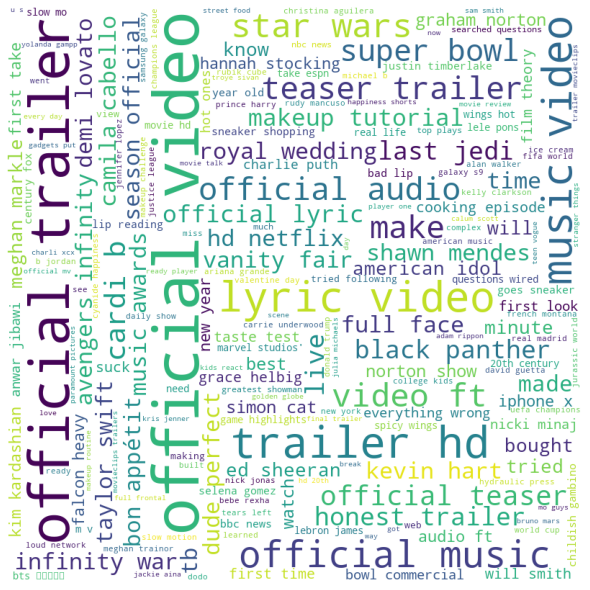

In [14]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("Video_Title_Wordcloud")
plt.show() 

Now, I repeat the word cloud analysis and visualization technique for video descriptions to see if any new themes or insights appear. 

In [ ]:
# create a word cloud for video descriptions
desc_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the words in title column
for val in neg_df.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    desc_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(desc_words)

The code below plots the word cloud of video descriptions. As seen in the image below, some common themes appear like (social media (instagram, twitter) and interaction ideas (subscribe, follow, vote). 

In [ ]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("Video_Description_Wordcloud")
plt.show() 

## Part 4: Analysis of Channel Association
### Research Question 5: Is popularity attributed to specific videos or channels/uploaders?

This section assesses the hypothesis that Youtube promotes videos from popular channels over individual videos. I start by grouping the videos by whether or not they belong to a channel that has other trending videos in the dataset. I add a column to count the frequency to the dataset. A snapshot of the data with the added metric is shown below. 

In [ ]:
# Count number of videos per channel 
df['freq'] = df.groupby('channel_title')['channel_title'].transform('count')
df

I set a threshold of different frequency values to see if there are repeated videos from the same channels. As seen with the output below, There are only 127 videos in the data which belong to channels with no other trending videos in the list. However, the vast majority of trending videos are from channels with at least 10 other videos in the trending list. This validates the initial hypothesis. 

In [ ]:
# find the number of videos from the same channel
# Videos unique to a channel
freq_df = df[df['freq']<2]
print(len(freq_df))
# videos from channels with at least 10 other trending videos
freq_df = df[df['freq']>10]
print(len(freq_df))
# videos from channels with at least 100 other trending videos
freq_df = df[df['freq']>100]
print(len(freq_df))

## Findings

After completing analysis of the trending videos on Youtube data, I found several insights that would be useful to people who watch Youtube videos and people who use Youtube to upload their videos and share them with the world. Some clear associations that I found were the correlation with reactions to views. This indicates why uploaders insist on engagement beyond just watching their videos. Usually, they supplement the video with a suggestion or plea to like, share and subscribe. These actions help increase viewership. Additionally, videos with more like than dislikes or a higher positive polarization are more likely to gain more views. Therefore, this insight rejects the idea that any publicity is good publicity. Dislikes can actually harm a video's popularity. This is also validated by the insight that less than one percent of the videos in this data have a negative polarization, which can be interpreted as: it is difficult but not impossible for negative videos to trend. Additionally, analysis of video text highlights some of the themes which appear in trending videos. New releases such as music videos or trailers tend to make it to trending lists as expected. Also, entertainment, sports, and celebrities top trending lists. An interesting insight revealed by analyzing video comments is that a common theme is promotion and user engagement. This attests to the claim that youtubers benefit from increased engagement other than viewership. 

## Implications and Limitations

There are several implications of what makes videos trend that affect different groups of people. Since what people watch is mostly algorithm controlled, it is difficult to attribute trends to popularity. An algorithm which is driven by a business model designed to benefit promoters will always promote already famous of paid content over naturally viral videos by common people. Thus, trends may not be a true reflection of people's interests. Additionally, the algorithm and business-driven recommendation systems may cause a cyclical effect in which people's interests change based on what is percieved as popular rather than what they would have selected given no recommendatation. The false or fabricated perception of popular would also affect uploaders who may modify their content to serve this target baseline of popularity. Due to these limitations and implications, genuine popularity is very difficult to assess. 

## Conclusion

The goal of this research was to find common themes in top trending videos of Youtube and see what that reveals about people and Youtube itself. This fully reproducible research finds some insights on the value of user reactions on video viewership and popular themes for trending videos. However, it is important to note that popularity is a perception which can be exaggerated or fabricated and Youtube is a tool which empowers this capability. Therefore, the insights gained from this analysis must be interpreted with this background knowledge. 